# Import liberaries

In [1]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn


# Reading data from CSV file

In [2]:
df=pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0



# Analysis & preprocessing


In [4]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
df.isnull().any()

HeartDiseaseorAttack    False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
Diabetes                False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

In [8]:
df['Age'] = df['Age']*4
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,36.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,28.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,36.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,44.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,44.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,20.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,44.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,28.0,5.0,1.0



# Visualization

In [9]:
df['Age'].max()

52.0

In [10]:
df['Age'].min()

4.0

### Viz 1

giving some over view about the age of people here in this dataset

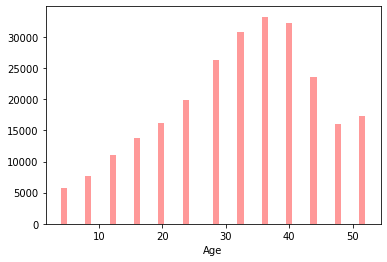

In [11]:
sns.distplot(df['Age'], kde=False, color='red')

### Viz 2 

showing some data about the smokers and how many smokers in each Gender and how it affect on them

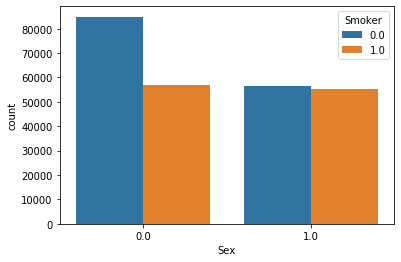

In [14]:
sns.countplot(x='Sex', data=df, hue='Smoker')

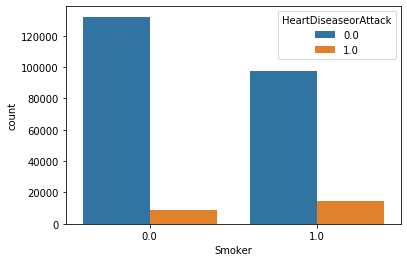

In [15]:
sns.countplot(x='Smoker', data=df, hue='HeartDiseaseorAttack')

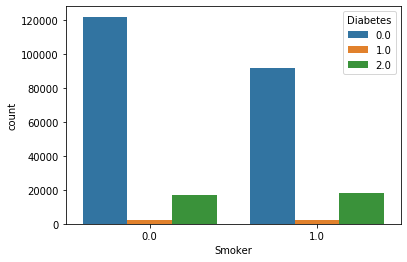

In [16]:
sns.countplot(x='Smoker', data=df, hue='Diabetes')

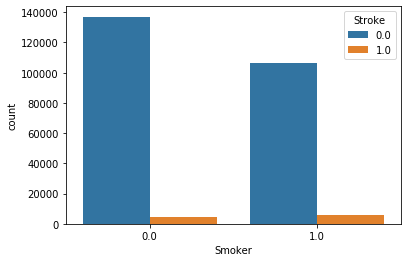

In [17]:
sns.countplot(x='Smoker', data=df, hue='Stroke')

### Viz 3

showing some data about the people in each gender has diabetes

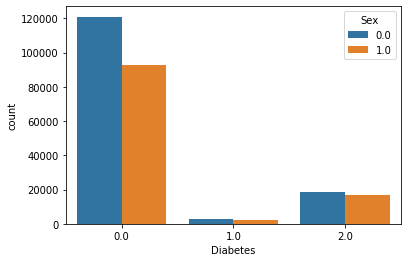

In [19]:
sns.countplot(x='Diabetes', data=df, hue='Sex')

### Viz 4

Here we gonna see how physical activity is important to be good and avoid lot of things such as Diabetes and HeartDiseaseorAttack and etc ....

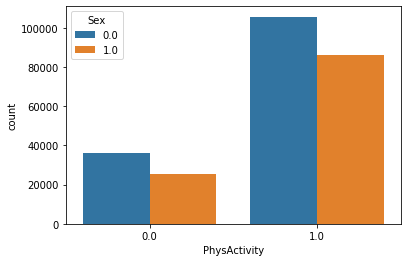

In [21]:
sns.countplot(x='PhysActivity', data=df, hue='Sex')

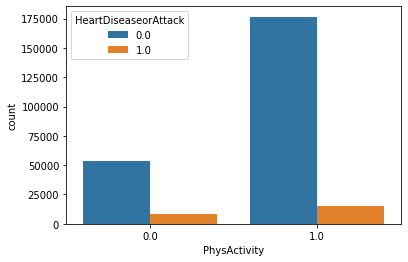

In [22]:
sns.countplot(x='PhysActivity', data=df, hue='HeartDiseaseorAttack')

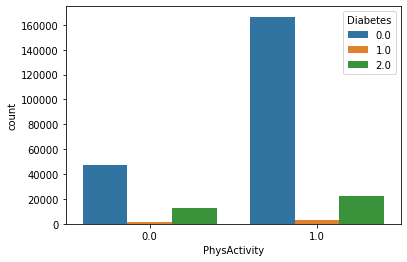

In [23]:
sns.countplot(x='PhysActivity', data=df, hue='Diabetes')

### Viz 5 

showing the education lvl of every person 

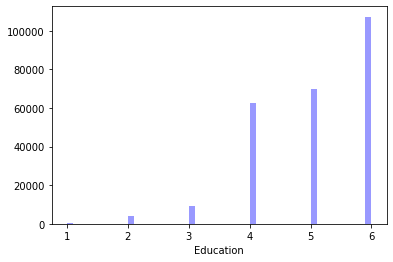

In [25]:
sns.distplot(df['Education'], kde=False, color='Blue')

### Viz 6 
we here seeing the income for every person in this dataset

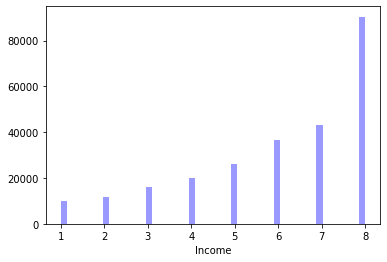

In [27]:
sns.distplot(df['Income'], kde=False, color='Blue')

### Viz 7

Showing how many people eating at least 1 fruit & Veggies per day and if this protect them from Diseases

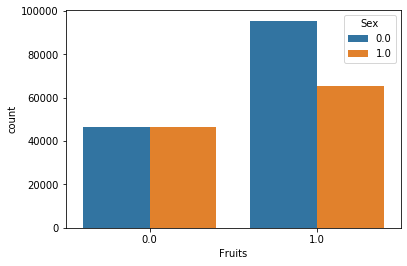

In [30]:
sns.countplot(x='Fruits', data=df, hue='Sex')

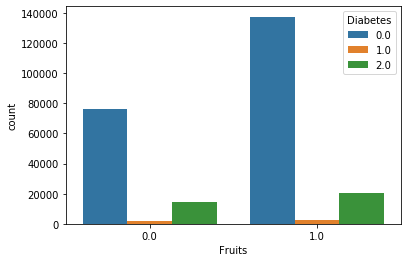

In [31]:
sns.countplot(x='Fruits', data=df, hue='Diabetes')

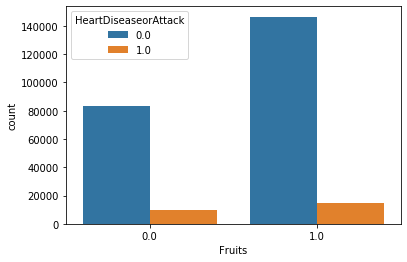

In [32]:
sns.countplot(x='Fruits', data=df, hue='HeartDiseaseorAttack')

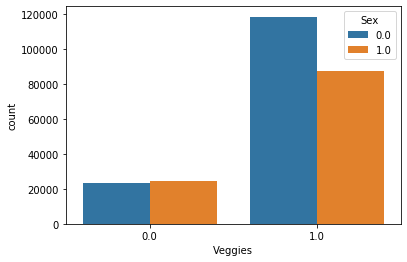

In [33]:
sns.countplot(x='Veggies', data=df, hue='Sex')

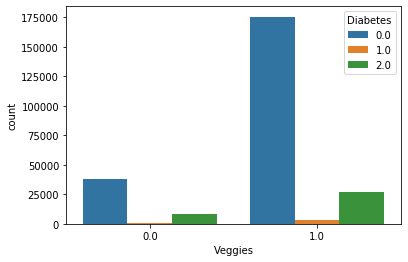

In [34]:
sns.countplot(x='Veggies', data=df, hue='Diabetes')

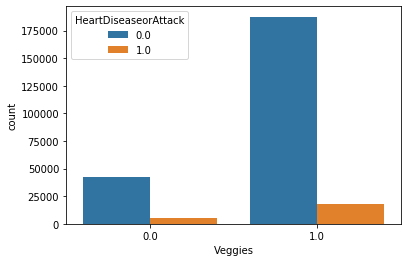

In [35]:
sns.countplot(x='Veggies', data=df, hue='HeartDiseaseorAttack')

### Viz 8 
we here seeing the relation between Body mass and heart Diseases and if body mass can affect on person with making it possible to have heart Diseases or any other Diseases or not

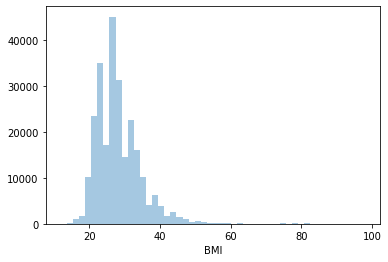

In [36]:
sns.distplot(df['BMI'], kde=False)

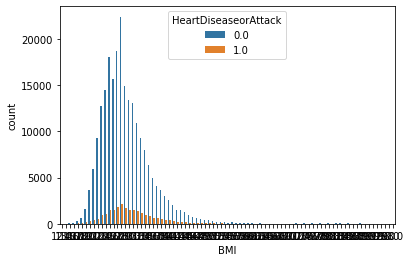

In [37]:
sns.countplot(x='BMI', data=df, hue='HeartDiseaseorAttack')

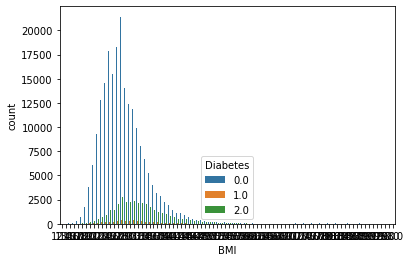

In [38]:
sns.countplot(x='BMI', data=df, hue='Diabetes')

### Viz 9 
we see here how healthcare is so important and how it affect on person and make him good more than people who don't have

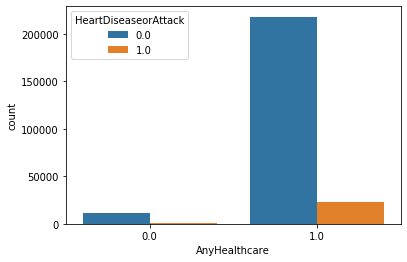

In [42]:
sns.countplot(x='AnyHealthcare', data=df, hue='HeartDiseaseorAttack')

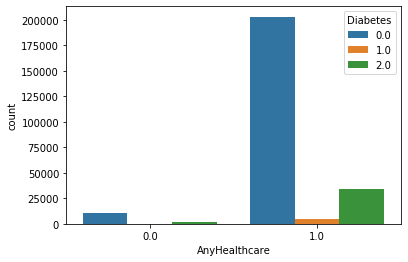

In [43]:
sns.countplot(x='AnyHealthcare', data=df, hue='Diabetes')

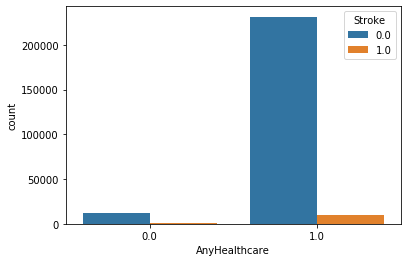

In [44]:
sns.countplot(x='AnyHealthcare', data=df, hue='Stroke')

# Spliting data 

In [46]:
x=df.drop(['HeartDiseaseorAttack', 'Education', 'Income'], axis=1)
y=df['HeartDiseaseorAttack']

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
y_train.value_counts()

0.0    160757
1.0     16819
Name: HeartDiseaseorAttack, dtype: int64

In [48]:
sampler=SMOTE()
x_train,y_train=sampler.fit_resample(x_train,y_train)
y_train.value_counts()

1.0    160757
0.0    160757
Name: HeartDiseaseorAttack, dtype: int64

# Scaling & predicting

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 0.88232827, -1.16476844,  0.16387153, ..., -0.64170529,
        -1.0631004 ,  0.70221247],
       [-1.21661194, -1.16476844,  0.16387153, ..., -0.64170529,
        -1.0631004 , -0.67640952],
       [ 0.88232827,  0.93387258,  0.16387153, ..., -0.64170529,
        -1.0631004 ,  0.35755697],
       ...,
       [ 0.88232827,  0.93387258,  0.16387153, ...,  0.71153844,
         1.03447415, -0.33175402],
       [-1.21661194,  0.93387258,  0.16387153, ..., -0.64170529,
         1.03447415,  1.39152346],
       [ 0.88232827,  0.93387258,  0.16387153, ..., -0.64170529,
         1.03447415,  0.70221247]])

In [50]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'NB':GaussianNB(),
    'XGC':XGBClassifier(),
    'RF':RandomForestClassifier()
    
}

In [51]:
for name,model in  models.items():
    print(f'using {name}: ')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'Training Accuracy :{accuracy_score(y_train,model.predict(x_train))}')
    print(f'Testing Accuracy :{accuracy_score(y_test,y_pred)}')
    print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred)}')
    print(f'Recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print(f'Fbeta-score: {fbeta_score(y_test,y_pred,beta=0.5)}')
    print(classification_report(y_test,y_pred))
    print('-'*33)
    

using LR: 
Training Accuracy :0.7787530247516438
Testing Accuracy :0.753731735519815
Confusion matrix:
 [[51756 17274]
 [ 1468  5606]]
Recall: 0.7924795024031666
precision: 0.2450174825174825
F1-score: 0.3743072711490953
Fbeta-score: 0.28429721889770165
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     69030
         1.0       0.25      0.79      0.37      7074

    accuracy                           0.75     76104
   macro avg       0.61      0.77      0.61     76104
weighted avg       0.90      0.75      0.80     76104

---------------------------------
using KNN: 
Training Accuracy :0.9384443601211767
Testing Accuracy :0.8282350467780931
Confusion matrix:
 [[59877  9153]
 [ 3919  3155]]
Recall: 0.4459994345490529
precision: 0.2563373415664608
F1-score: 0.3255597977504901
Fbeta-score: 0.2801655241004511
              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90     69030
         1.0       0.

C:\MyAnaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Training Accuracy :0.9447831198641428
Testing Accuracy :0.9057605382108693
Confusion matrix:
 [[67870  1160]
 [ 6012  1062]]
Recall: 0.15012722646310434
precision: 0.47794779477947796
F1-score: 0.22848537005163513
Fbeta-score: 0.33266507956396446
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     69030
         1.0       0.48      0.15      0.23      7074

    accuracy                           0.91     76104
   macro avg       0.70      0.57      0.59     76104
weighted avg       0.88      0.91      0.88     76104

---------------------------------
using RF: 
Training Accuracy :0.9911792332526733
Testing Accuracy :0.8926731840639125
Confusion matrix:
 [[66756  2274]
 [ 5894  1180]]
Recall: 0.16680802940344924
precision: 0.34163288940359005
F1-score: 0.2241641337386018
Fbeta-score: 0.28243178554332216
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     69030
         1.0       0.34  

In [52]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
import joblib
joblib.dump(model,'model')
joblib.dump(scaler,'scaler')

['scaler']